# Theoretical Questions


Ans1: A Decision Tree is a supervised machine learning model used for classification and regression tasks. It splits the dataset into subsets based on the value of input features. The structure resembles a tree:

Root node: represents the entire dataset.

Internal nodes: represent feature tests.

Leaf nodes: represent the output (class label or continuous value).

The tree grows by selecting the best feature at each step using a criterion (like Gini or Entropy) to make decisions.

Ans2: Impurity measures quantify how "mixed" the classes are in a node. A pure node contains samples from a single class. Common impurity measures:

Gini Impurity

Entropy (Information Gain)

Classification Error (less common)

Ans3: Gini=1−
i=1
∑
C
​
 p
i
2
​

Where:

𝑝
𝑖
p
i
​
  is the proportion of class
𝑖
i in the node

𝐶
C is the total number of classes



Ans4: Entropy=−
i=1
∑
C
​
 p
i
​
 log
2
​
 (p
i
​
 )
Where:

𝑝
𝑖
p
i
​
  is the proportion of class
𝑖
i in the node



Ans5: Information Gain (IG) measures the reduction in impurity after a dataset is split on a feature.

𝐼
𝐺
=
𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
(
𝑝
𝑎
𝑟
𝑒
𝑛
𝑡
)
−
∑
𝑘
=
1
𝐾
𝑁
𝑘
𝑁
⋅
𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
(
𝑐
ℎ
𝑖
𝑙
𝑑
𝑘
)
IG=Entropy(parent)−
k=1
∑
K
​
  
N
N
k
​

​
 ⋅Entropy(child
k
​
 )
Where:

𝑁
N is total samples in the parent node

𝑁
𝑘
N
k
​
  is samples in child node
𝑘
k

𝐾
K is number of child nodes

Usage: The tree selects the feature with the highest IG to split the data.



Ans6:  The difference between Gini Impurity and Entropy:-

Gini Index

The Gini Index is the additional approach to dividing a decision tree.
Purity and impurity in a junction are the primary focus of the Entropy and Information Gain framework.
The Gini Index, also known as Impurity, calculates the likelihood that somehow a randomly picked instance would be erroneously cataloged.


Entropy:

The word "entropy," is hails from physics, and refers to an indicator of the disorder. The expected volume of "information," "surprise," or "uncertainty" associated with a randomly chosen variable's potential outcomes is characterized as the entropy of the variable in information theory.
Entropy is a quantifiable and measurable physical attribute and a scientific notion that is frequently associated with a circumstance of disorder, unpredictability, or uncertainty.
From classical thermodynamics, where it was originally identified, through the macroscopic portrayal of existence in statistical physics, to the principles of information theory, the terminology, and notion are widely used in a variety of fields of study

Ans7: A Decision Tree partitions the feature space recursively:

At each node, select the best feature and threshold by minimizing impurity (Gini, Entropy).

Recursively split child nodes until a stopping condition is met (e.g., max depth, min samples).

Leaf nodes hold the most probable class (classification) or average value (regression).

The overall process minimizes the expected impurity over all splits.

Ans8: Pre-pruning (Early stopping) halts tree growth early to avoid overfitting. Conditions may include:

Maximum tree depth

Minimum number of samples per leaf or split

Minimum gain in impurity

Ans9: Post-pruning builds a full tree first and then removes branches that do not improve performance (often using validation data). Types:

Reduced error pruning

Cost-complexity pruning (used in CART)

Ans10: The difference between Pre-Pruning and Post-Pruning :

Post-Pruning is used generally for small datasets whereas Pre-Pruning is used for larger ones. Pre-Pruning is considered more efficient and effective as it considered multiple parameters and choose best ones from them.


Ans11: A Decision Tree Regressor predicts continuous values instead of class labels. Instead of minimizing classification impurity, it minimizes:

𝑀
𝑆
𝐸
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
ˉ
)
2
MSE=
n
1
​
  
i=1
∑
n
​
 (y
i
​
 −
y
ˉ
​
 )
2

Where
𝑦
ˉ
y
ˉ
​
  is the mean of target values in the node.



Ans12: Advantages:

Easy to understand and interpret

Non-parametric (no assumptions about data distribution)

Handles both numerical and categorical data

Fast to train and predict

Disadvantages:

Prone to overfitting (especially deep trees)

Unstable (small changes can result in different trees)

Biased toward features with more levels

Not ideal for smooth or continuous boundaries



Ans13: Strategies:

Surrogate splits: use alternate features that closely mimic the original split.

Imputation: fill missing values using mean, median, or mode.

Ignore instance: skip records with missing data (less common).

Some implementations (like C4.5) distribute instances with missing values proportionally across branches.



Ans14: Categorical features can be split directly (e.g., Color in {Red, Blue}).

Some algorithms create binary splits using subsets of categories.

Most implementations (like scikit-learn) require one-hot encoding unless explicitly supported

Ans15: Some real-world applications of Decision Trees:-

Healthcare: disease diagnosis, treatment decision support

Finance: credit scoring, fraud detection

Marketing: customer segmentation, churn prediction

Manufacturing: quality control, predictive maintenance

E-commerce: product recommendation, inventory forecasting



# Practical Questions

In [1]:
pip install scikit-learn graphviz matplotlib


In [2]:
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import graphviz
import os

In [3]:
#Ans16
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and print accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


In [4]:
#Ans17
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train Decision Tree with Gini impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Print feature importances
for feature_name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")


sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [5]:
#Ans18
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree with Entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict and print accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Entropy): {accuracy:.4f}")


Model Accuracy (Entropy): 0.9778


In [6]:
#Ans19
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.5280


In [7]:
#Ans20
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Export tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render and view tree
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format="png", cleanup=True)
graph.view("iris_tree.png")

print("Decision tree visualization saved as iris_tree.png")


Decision tree visualization saved as iris_tree.png


In [8]:
#Ans21
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fully grown tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Tree with max depth 3
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train, y_train)
y_pred_depth3 = clf_depth3.predict(X_test)
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)

print(f"Accuracy (Full Tree): {accuracy_full:.4f}")
print(f"Accuracy (Max Depth = 3): {accuracy_depth3:.4f}")


Accuracy (Full Tree): 1.0000
Accuracy (Max Depth = 3): 1.0000


In [9]:
#Ans22
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default tree
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# Tree with min_samples_split=5
clf_split5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_split5.fit(X_train, y_train)
y_pred_split5 = clf_split5.predict(X_test)
acc_split5 = accuracy_score(y_test, y_pred_split5)

print(f"Default Tree Accuracy: {acc_default:.4f}")
print(f"Tree with min_samples_split=5 Accuracy: {acc_split5:.4f}")


Default Tree Accuracy: 1.0000
Tree with min_samples_split=5 Accuracy: 1.0000


In [10]:
#Ans23
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train on raw data
clf_raw = DecisionTreeClassifier(random_state=42)
clf_raw.fit(X_train, y_train)
y_pred_raw = clf_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train on scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy (Unscaled): {acc_raw:.4f}")
print(f"Accuracy (Scaled): {acc_scaled:.4f}")


Accuracy (Unscaled): 1.0000
Accuracy (Scaled): 1.0000


In [11]:
#Ans24
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Wrap classifier with One-vs-Rest
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)

# Predict
y_pred = ovr_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"One-vs-Rest Accuracy: {acc:.4f}")


One-vs-Rest Accuracy: 1.0000


In [12]:
#Ans25
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Feature importances
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")


sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


In [13]:
#Ans26
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Unrestricted tree
reg_full = DecisionTreeRegressor(random_state=42)
reg_full.fit(X_train, y_train)
y_pred_full = reg_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

# Tree with max_depth=5
reg_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_depth5.fit(X_train, y_train)
y_pred_depth5 = reg_depth5.predict(X_test)
mse_depth5 = mean_squared_error(y_test, y_pred_depth5)

print(f"Full Tree MSE: {mse_full:.4f}")
print(f"Tree with max_depth=5 MSE: {mse_depth5:.4f}")


Full Tree MSE: 0.5280
Tree with max_depth=5 MSE: 0.5211


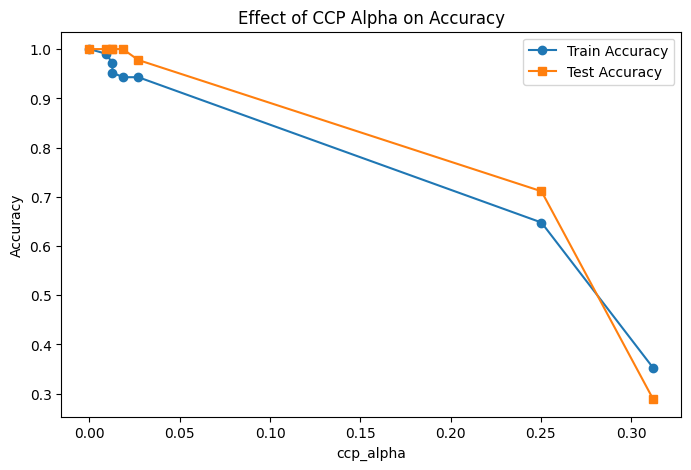

In [14]:
#Ans27
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train initial tree and get effective alphas
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_scores = []
test_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_scores.append(train_acc)
    test_scores.append(test_acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='s', label='Test Accuracy')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of CCP Alpha on Accuracy")
plt.show()


In [15]:
#Ans28
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



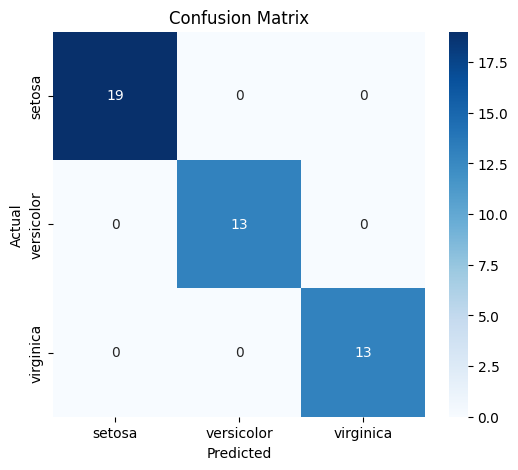

In [16]:
#Ans29
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
#Ans30
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Grid search
param_grid = {
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5
)

grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV accuracy: {grid.best_score_:.4f}")

# Evaluate on test set
test_acc = grid.best_estimator_.score(X_test, y_test)
print(f"Test accuracy with best parameters: {test_acc:.4f}")


Best parameters: {'max_depth': None, 'min_samples_split': 10}
Best CV accuracy: 0.9429
Test accuracy with best parameters: 1.0000
